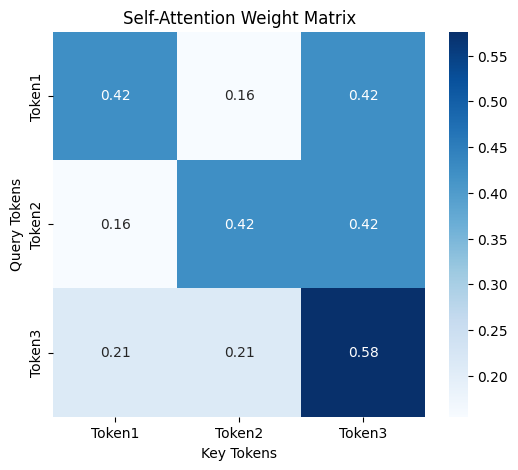

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def scaled_dot_product_attention(Q, K, V):
    """Compute self-attention scores and visualize attention."""
    d_k = Q.shape[-1]  # Key dimension
    scores = torch.matmul(Q, K.T) / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))  # Compute QK^T / sqrt(d_k)
    attention_weights = F.softmax(scores, dim=-1)  # Apply softmax
    output = torch.matmul(attention_weights, V)  # Weighted sum of values
    return output, attention_weights

# Example input: 3 tokens, each represented as a 4D vector
Q = torch.tensor([[1, 0, 1, 0], 
                  [0, 1, 0, 1], 
                  [1, 1, 1, 1]], dtype=torch.float32)

K = Q.clone()  # Keys are the same as Queries in self-attention
V = torch.tensor([[2, 0, 2, 0], 
                  [0, 3, 0, 3], 
                  [1, 1, 1, 1]], dtype=torch.float32)

output, attention_weights = scaled_dot_product_attention(Q, K, V)

# Convert to NumPy for plotting
attention_weights_np = attention_weights.detach().numpy()

# Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(attention_weights_np, annot=True, cmap="Blues", xticklabels=["Token1", "Token2", "Token3"], yticklabels=["Token1", "Token2", "Token3"])
plt.title("Self-Attention Weight Matrix")
plt.xlabel("Key Tokens")
plt.ylabel("Query Tokens")
plt.show()


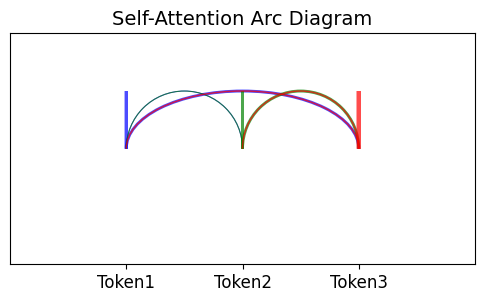

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def scaled_dot_product_attention(Q, K, V):
    """Compute self-attention scores."""
    d_k = Q.shape[-1]  # Key dimension
    scores = torch.matmul(Q, K.T) / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))  # QK^T / sqrt(d_k)
    attention_weights = F.softmax(scores, dim=-1)  # Apply softmax
    output = torch.matmul(attention_weights, V)  # Weighted sum of values
    return output, attention_weights

# Example input: 3 tokens, each represented as a 4D vector
Q = torch.tensor([[1, 0, 1, 0], 
                  [0, 1, 0, 1], 
                  [1, 1, 1, 1]], dtype=torch.float32)

K = Q.clone()  # Keys are the same as Queries in self-attention
V = torch.tensor([[2, 0, 2, 0], 
                  [0, 3, 0, 3], 
                  [1, 1, 1, 1]], dtype=torch.float32)

output, attention_weights = scaled_dot_product_attention(Q, K, V)

# Convert to NumPy for visualization
attention_weights_np = attention_weights.detach().numpy()
tokens = ["Token1", "Token2", "Token3"]

def draw_arc(ax, start, end, weight, color='blue'):
    """Draw a curved arc between two tokens."""
    arc = patches.Arc(((start + end) / 2, 1), abs(end - start), 1, angle=0, theta1=0, theta2=180, 
                       linewidth=5 * weight, color=color, alpha=0.7)
    ax.add_patch(arc)

# Create figure
plt.figure(figsize=(6, 3))
ax = plt.gca()
ax.set_xlim(-1, len(tokens))
ax.set_ylim(0, 2)
ax.set_xticks(range(len(tokens)))
ax.set_xticklabels(tokens, fontsize=12)
ax.set_yticks([])

# Color gradient for different weights
colors = ["blue", "green", "red"]

# Draw arcs based on attention scores
for i in range(len(tokens)):
    for j in range(len(tokens)):
        if attention_weights_np[i, j] > 0.1:  # Ignore weak attention
            color = colors[i % len(colors)]  # Assign different colors per query token
            draw_arc(ax, i, j, attention_weights_np[i, j], color=color)

plt.title("Self-Attention Arc Diagram", fontsize=14)
plt.show()


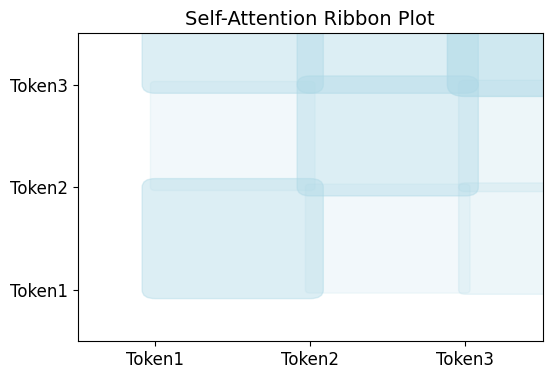

In [3]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def scaled_dot_product_attention(Q, K, V):
    """Compute self-attention scores."""
    d_k = Q.shape[-1]  # Key dimension
    scores = torch.matmul(Q, K.T) / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))  # QK^T / sqrt(d_k)
    attention_weights = F.softmax(scores, dim=-1)  # Apply softmax
    output = torch.matmul(attention_weights, V)  # Weighted sum of values
    return output, attention_weights

# Example input: 3 tokens, each represented as a 4D vector
Q = torch.tensor([[1, 0, 1, 0], 
                  [0, 1, 0, 1], 
                  [1, 1, 1, 1]], dtype=torch.float32)

K = Q.clone()  # Keys are the same as Queries in self-attention
V = torch.tensor([[2, 0, 2, 0], 
                  [0, 3, 0, 3], 
                  [1, 1, 1, 1]], dtype=torch.float32)

output, attention_weights = scaled_dot_product_attention(Q, K, V)

# Convert to NumPy for visualization
attention_weights_np = attention_weights.detach().numpy()
tokens = ["Token1", "Token2", "Token3"]

# Create figure
fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim(-0.5, len(tokens) - 0.5)
ax.set_ylim(-0.5, len(tokens) - 0.5)
ax.set_xticks(range(len(tokens)))
ax.set_xticklabels(tokens, fontsize=12)
ax.set_yticks(range(len(tokens)))
ax.set_yticklabels(tokens, fontsize=12)

# Draw ribbons
for i in range(len(tokens)):
    for j in range(len(tokens)):
        if attention_weights_np[i, j] > 0.1:  # Ignore weak attention
            width = attention_weights_np[i, j] * 2  # Scale width
            ribbon = patches.FancyBboxPatch((i, j), 1, 1, boxstyle=f"round,pad={width/10}",
                                             color="lightblue", alpha=attention_weights_np[i, j])
            ax.add_patch(ribbon)

plt.title("Self-Attention Ribbon Plot", fontsize=14)
plt.show()


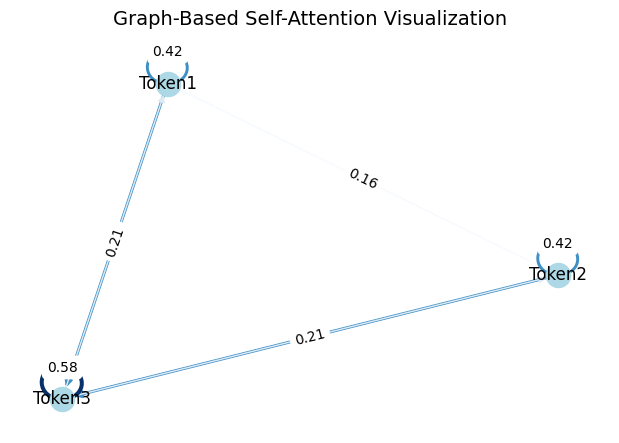

In [4]:
import torch
import torch.nn.functional as F
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

def scaled_dot_product_attention(Q, K, V):
    """Compute self-attention scores."""
    d_k = Q.shape[-1]  # Key dimension
    scores = torch.matmul(Q, K.T) / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))  # QK^T / sqrt(d_k)
    attention_weights = F.softmax(scores, dim=-1)  # Apply softmax
    output = torch.matmul(attention_weights, V)  # Weighted sum of values
    return output, attention_weights

# Example input: 3 tokens, each represented as a 4D vector
Q = torch.tensor([[1, 0, 1, 0], 
                  [0, 1, 0, 1], 
                  [1, 1, 1, 1]], dtype=torch.float32)

K = Q.clone()  # Keys are the same as Queries in self-attention
V = torch.tensor([[2, 0, 2, 0], 
                  [0, 3, 0, 3], 
                  [1, 1, 1, 1]], dtype=torch.float32)

output, attention_weights = scaled_dot_product_attention(Q, K, V)

# Convert to NumPy for visualization
attention_weights_np = attention_weights.detach().numpy()
tokens = ["Token1", "Token2", "Token3"]

# Create directed graph
G = nx.DiGraph()

# Add nodes
for token in tokens:
    G.add_node(token)

# Add weighted edges based on attention scores
for i in range(len(tokens)):
    for j in range(len(tokens)):
        if attention_weights_np[i, j] > 0.1:  # Ignore weak connections
            G.add_edge(tokens[i], tokens[j], weight=attention_weights_np[i, j])

# Get edge weights for visualization
edges, weights = zip(*nx.get_edge_attributes(G, "weight").items())

# Draw graph
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G, seed=42)  # Layout for positioning nodes
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color=weights, width=[w * 5 for w in weights],
        edge_cmap=plt.cm.Blues, arrows=True, font_size=12)

# Add edge labels (attention values)
edge_labels = {(tokens[i], tokens[j]): f"{attention_weights_np[i, j]:.2f}" for i in range(len(tokens)) for j in range(len(tokens)) if attention_weights_np[i, j] > 0.1}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

plt.title("Graph-Based Self-Attention Visualization", fontsize=14)
plt.show()
